In [52]:
import math
from scipy.stats import norm

In [53]:
!pip install yfinance

In [54]:
import yfinance as yf
import numpy
import matplotlib.pyplot as plt

In [56]:
ticker = input("What Stock do you want to analyze? ")
start = input("Start date of stock analysis(YYYY-MM-DD): ")
end = input("End date of stock analysis(YYYY-MM-DD): ")
T = int(input("How many days till expiration: "))
r = float(input("Risk-free interest rate(in decimal form): "))
data = yf.download(ticker, start, end) #stock data from JAN 1 2023 to JAN 1 2024
print(data.head())

What Stock do you want to analyze? BA
Start date of stock analysis(YYYY-MM-DD): 2007-06-15
End date of stock analysis(YYYY-MM-DD): 2025-06-15
How many days till expiration: 45
Risk-free interest rate(in decimal form): 0.08


/tmp/ipython-input-1858686549.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start, end) #stock data from JAN 1 2023 to JAN 1 2024
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open   Volume
Ticker             BA         BA         BA         BA       BA
Date                                                           
2007-06-15  71.430954  72.777334  71.270843  72.428000  7178100
2007-06-18  70.885117  71.743889  70.805061  71.343612  4109300
2007-06-19  70.535774  71.496435  70.237390  70.885108  5120200
2007-06-20  69.924431  71.117978  69.873487  70.666757  4733900
2007-06-21  70.739540  70.739540  69.262162  69.924438  6288900


In [57]:
S = data["Close"].iloc[-1] #most recent price of stock in dataset before market closed

In [58]:
K = S *1.05 #price at which option will allow you to buy stock is 5% more than current price

In [59]:
returns = data["Close"].pct_change().dropna()
volatility = returns.std() * numpy.sqrt(252)  # annualized volatility

In [60]:
from scipy.stats import norm

def black_scholes_call(S, K, T, r, volatility):
    d1 = (numpy.log(S/K) + (r + 0.5*volatility**2)*T) / (volatility*numpy.sqrt(T))
    d2 = d1 - volatility*numpy.sqrt(T)
    call_price = S*norm.cdf(d1) - K*numpy.exp(-r*T)*norm.cdf(d2)
    return call_price


In [61]:
callprice = black_scholes_call(S,K, T, r, volatility)
print(f"Estimated call price for Apple: {callprice}")

Estimated call price for Apple: Ticker
BA    196.223629
Name: 2025-06-13 00:00:00, dtype: float64


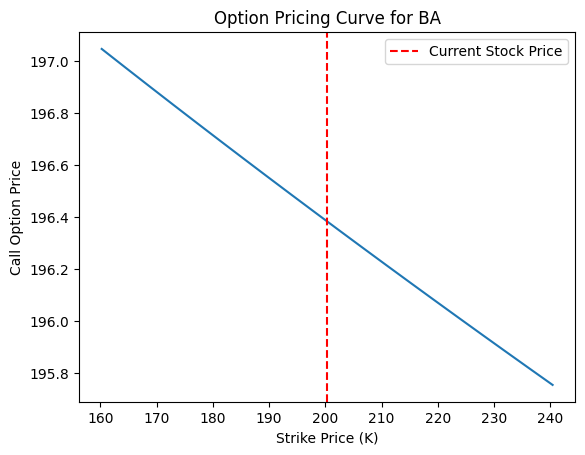

In [63]:
K_values = numpy.linspace(0.8*S, 1.2*S, 20)
prices = [black_scholes_call(S, K, T, r, volatility) for K in K_values]

plt.plot(K_values, prices)
plt.axvline(S.iloc[0], color="red", linestyle="--", label="Current Stock Price")
plt.xlabel("Strike Price (K)")
plt.ylabel("Call Option Price")
plt.title(f"Option Pricing Curve for {ticker}")
plt.legend()
plt.show()